![Задача](task.png)

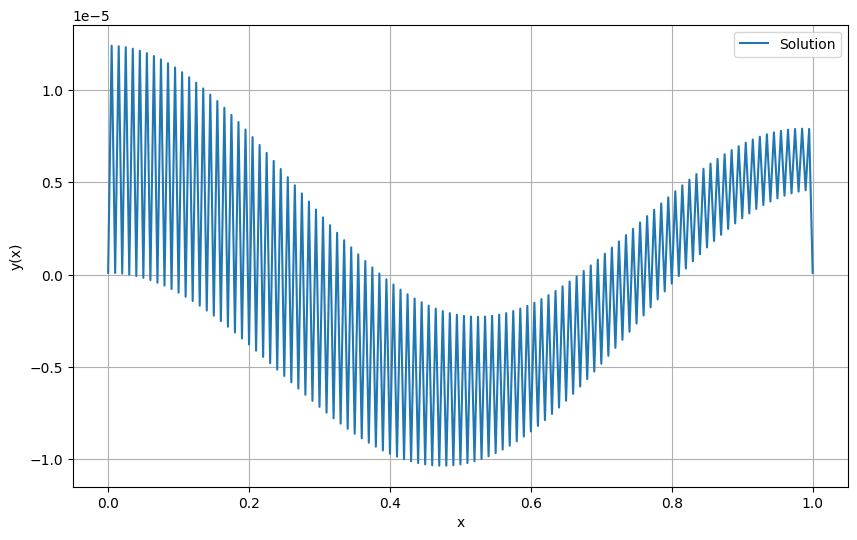

In [9]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.005
N = int(1 / h)
x = np.linspace(0, 1 - h, N)  
N_points = len(x)

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f_func(x):
    return np.cos(2 * np.pi * x)

a = np.full(N_points, 1 / h**2)
b = -2 / h**2 - P2(x)
c = np.full(N_points, 1 / h**2)
d = -f_func(x)

alpha = np.zeros(N_points)
beta = np.zeros(N_points)
gamma = np.zeros(N_points)

alpha[0] = c[0] / b[0]
beta[0] = d[0] / b[0]
gamma[0] = a[0] / b[0]

for n in range(1, N_points):
    denominator = b[n] - a[n] * alpha[n - 1]
    alpha[n] = c[n] / denominator
    beta[n] = (d[n] + a[n] * beta[n - 1]) / denominator
    gamma[n] = (a[n] * gamma[n - 1]) / denominator

denominator_N = b[N_points - 1] - a[N_points - 1] * alpha[N_points - 2] - a[N_points - 1] * gamma[N_points - 2]
mu_N = -c[N_points - 1] / denominator_N
nu_N = (d[N_points - 1] + a[N_points - 1] * beta[N_points - 2]) / denominator_N

mu = np.zeros(N_points)
nu = np.zeros(N_points)

mu[N_points - 1] = mu_N
nu[N_points - 1] = nu_N

for n in range(N_points - 2, -1, -1):
    mu[n] = alpha[n] * mu[n + 1] + gamma[n] * mu_N
    nu[n] = beta[n] + alpha[n] * nu[n + 1] + gamma[n] * nu_N

y0 = nu[0] / (1 - mu[0])
y = np.zeros(N_points)
y[0] = y0

for n in range(1, N_points):
    y[n] = alpha[n - 1] * y[n - 1] + beta[n - 1] + gamma[n - 1] * y0

# циклиность
x_full = np.append(x, 1)
y_full = np.append(y, y0)

plt.figure(figsize=(10, 6))
plt.plot(x_full, y_full, label='Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()